**Import Library**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense
from keras.layers import Dropout
from tensorflow.keras.utils import to_categorical

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score

# **Data Wrangling**

**Gathering Data**

In [2]:
gymdiet_df = pd.read_csv('https://raw.githubusercontent.com/gitagpds/dataset_fix/refs/heads/main/gym_and_diet_recommendation_cleaned_data.csv')

In [3]:
gymdiet_df.head()

,ID,Sex,Age,Height,Weight,Hypertension,Diabetes,Exercises,Diet
0,1,Male,18,1.68,47.5,No,No,"Squats, deadlifts, bench presses, and overhead...","Vegetables: (Carrots, Sweet Potato, and Lettuc..."
1,2,Male,18,1.68,47.5,Yes,No,"Squats, deadlifts, bench presses, and overhead...","Vegetables: (Tomatoes, Garlic, leafy greens, b..."
2,3,Male,18,1.68,47.5,No,Yes,"Squats, yoga, deadlifts, bench presses, and ov...","Vegetables: (Garlic, Roma Tomatoes, Capers and..."
3,4,Male,18,1.68,47.5,Yes,Yes,"Squats, yoga, deadlifts, bench presses, and ov...","Vegetables: (Garlic, Roma Tomatoes, Capers, Gr..."
4,5,Male,18,1.68,47.5,No,No,"Squats, deadlifts, bench presses, and overhead...","Vegetables: (Carrots, Sweet Potato, Lettuce); ..."


Menampilkan 5 baris pertama dari DataFrame gymdiet

**Assessing Data**

In [4]:
gymdiet_df.shape

(14553, 9)

In [5]:
gymdiet_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14553 entries, 0 to 14552
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   ID            14553 non-null  int64  
 1   Sex           14553 non-null  object 
 2   Age           14553 non-null  int64  
 3   Height        14553 non-null  float64
 4   Weight        14553 non-null  float64
 5   Hypertension  14553 non-null  object 
 6   Diabetes      14553 non-null  object 
 7   Exercises     14553 non-null  object 
 8   Diet          14553 non-null  object 
dtypes: float64(2), int64(2), object(5)
memory usage: 1023.4+ KB


Tidak ada masalah dengan tipe data dan jumlah data dari seluruh kolom tersebut

In [6]:
gymdiet_df.isnull().sum()

,0
ID,0
Sex,0
Age,0
Height,0
Weight,0
Hypertension,0
Diabetes,0
Exercises,0
Diet,0


Tidak terdapat missing values

In [7]:
print("Jumlah duplikasi: ", gymdiet_df.duplicated().sum())

Jumlah duplikasi:  0


Tidak ada data yang duplikat

In [8]:
gymdiet_df.describe()

,ID,Age,Height,Weight
count,14553.000000,14553.000000,14553.000000,14553.000000
mean,7293.878307,39.515220,1.699786,70.547550
std,4212.960335,13.183613,0.098188,20.032687
min,1.000000,18.000000,1.300000,32.000000
25%,3651.000000,28.000000,1.640000,55.000000
50%,7289.000000,39.000000,1.680000,70.000000
75%,10939.000000,51.000000,1.770000,86.000000
max,14589.000000,63.000000,2.030000,130.000000


Tidak ada inaccurate value pada kolom ID, Age, Height, Weight

# **Exploratory Data Analysis (EDA)**

In [9]:
gymdiet_df.sample(5)

,ID,Sex,Age,Height,Weight,Hypertension,Diabetes,Exercises,Diet
11466,11491,Male,24,1.64,41.0,No,Yes,"Squats, yoga, deadlifts, bench presses, and ov...","Vegetables: (Garlic, Roma Tomatoes, Capers and..."
2039,2040,Female,40,1.40,50.0,No,Yes,"Walking, Yoga, Swimming.","Vegetables: (Garlic, Mushroom, Green Papper, I..."
7341,7354,Male,32,1.49,102.0,No,No,"Brisk walking, cycling, swimming, running , or...","Vegetables: (Broccoli, Carrots, Spinach, Lettu..."
2391,2392,Male,23,1.68,72.0,No,Yes,"Walking, Yoga, Swimming.","Vegetables: (Garlic, Mushroom, Green Papper, I..."
10140,10165,Female,28,1.72,74.5,No,No,"Brisk walking, cycling, swimming, running , or...","Vegetables: (Broccoli, Carrots, Spinach, Lettu..."


In [10]:
gymdiet_df.describe(include="all")

,ID,Sex,Age,Height,Weight,Hypertension,Diabetes,Exercises,Diet
count,14553.000000,14553,14553.000000,14553.000000,14553.000000,14553,14553,14553,14553
unique,NaN,2,NaN,NaN,NaN,2,2,5,10
top,NaN,Male,NaN,NaN,NaN,No,No,"Brisk walking, cycling, swimming, running , or...","Vegetables: (Garlic, Mushroom, Green Papper, I..."
freq,NaN,9350,NaN,NaN,NaN,7820,7820,4206,5038
mean,7293.878307,NaN,39.515220,1.699786,70.547550,NaN,NaN,NaN,NaN
std,4212.960335,NaN,13.183613,0.098188,20.032687,NaN,NaN,NaN,NaN
min,1.000000,NaN,18.000000,1.300000,32.000000,NaN,NaN,NaN,NaN
25%,3651.000000,NaN,28.000000,1.640000,55.000000,NaN,NaN,NaN,NaN
50%,7289.000000,NaN,39.000000,1.680000,70.000000,NaN,NaN,NaN,NaN
75%,10939.000000,NaN,51.000000,1.770000,86.000000,NaN,NaN,NaN,NaN


In [11]:
gymdiet_df.groupby(by="Age").ID.nunique().sort_values(ascending=False)

,ID
Age,
24,442
28,401
32,385
25,378
18,368
33,363
27,363
29,363
26,362


In [12]:
gymdiet_df.groupby(by="Height").ID.nunique().sort_values(ascending=False)

,ID
Height,
1.68,2025
1.62,958
1.67,626
1.66,563
1.65,562
1.70,517
1.64,514
1.88,502
1.69,406


In [13]:
gymdiet_df.groupby(by="Weight").ID.nunique().sort_values(ascending=False)

,ID
Weight,
55.0,602
72.0,554
85.0,452
47.5,395
89.0,308
...,...
59.5,8
130.0,8
56.9,7


<ipython-input-14-b390225a4c87>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(ax=axes[0,0],x= gymdiet_df['Age'], palette = "Set1")


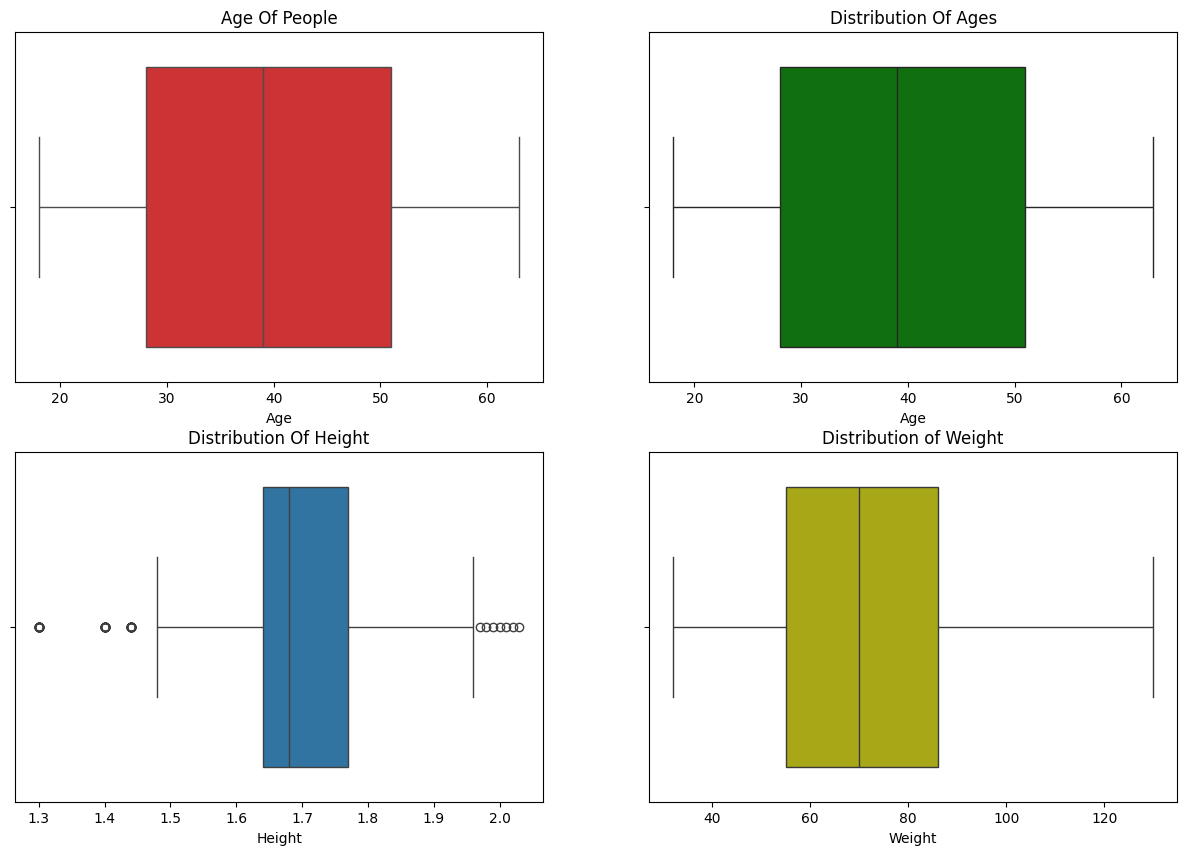

In [14]:
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

sns.boxplot(ax=axes[0,0],x= gymdiet_df['Age'], palette = "Set1")
axes[0,0].set_title('Age Of People')

# Pass gymdiet_df to the data parameter
sns.boxplot(ax=axes[0,1],x='Age', data=gymdiet_df, color="g")
axes[0,1].set_title('Distribution Of Ages')

# Pass gymdiet_df['Height'] to the x parameter, or gymdiet_df to the data parameter and 'Height' to x
sns.boxplot(ax=axes[1,0],x=gymdiet_df['Height'])
axes[1,0].set_title('Distribution Of Height')

# Pass gymdiet_df to the data parameter
sns.boxplot(ax=axes[1,1],x='Weight',data=gymdiet_df,color="y")
axes[1,1].set_title('Distribution of Weight')

plt.show()

# **Preprocessing Data**

In [15]:
# Encode categorical data
categorical_columns = ['Sex', 'Hypertension', 'Diabetes', 'Exercises', 'Diet']
label_encoders = {}

for col in categorical_columns:
    le = LabelEncoder()
    gymdiet_df[col] = le.fit_transform(gymdiet_df[col])
    label_encoders[col] = le

# Normalize numerical data
numerical_columns = ['Age', 'Height', 'Weight']
scaler = StandardScaler()
gymdiet_df[numerical_columns] = scaler.fit_transform(gymdiet_df[numerical_columns])

# Separate features and targets
X = gymdiet_df[['Sex', 'Age', 'Height', 'Weight', 'Hypertension', 'Diabetes']]
y_exercises = gymdiet_df['Exercises']
y_diet = gymdiet_df['Diet']

In [16]:
# Train-test split

# Split for exercises and diet target
X_train, X_test, y_train, y_test = train_test_split(
    X,
    np.column_stack((y_exercises, y_diet)),
    test_size=0.2,
    random_state=42
)

In [17]:
# Encode the 'Diet' column with LabelEncoder first
diet_encoder = LabelEncoder()
y_train_diet_labels = diet_encoder.fit_transform(y_train[:, 1])
y_test_diet_labels = diet_encoder.transform(y_test[:, 1])

# Now apply one-hot encoding
y_train_diet = to_categorical(y_train_diet_labels, num_classes=10)
y_test_diet = to_categorical(y_test_diet_labels, num_classes=10)

# For exercises, continue with one-hot encoding
y_train_exercises = to_categorical(y_train[:, 0], num_classes=5)
y_test_exercises = to_categorical(y_test[:, 0], num_classes=5)

In [18]:
# Check for NaN or missing values in your target variables
print("NaN in y_train_exercises:", np.isnan(y_train_exercises).any())
print("NaN in y_train_diet:", np.isnan(y_train_diet).any())
print("NaN in y_test_exercises:", np.isnan(y_test_exercises).any())
print("NaN in y_test_diet:", np.isnan(y_test_diet).any())

# Check and print the shapes again for confirmation
print("X_train shape:", X_train.shape)
print("y_train_exercises shape:", y_train_exercises.shape)
print("y_train_diet shape:", y_train_diet.shape)
print("y_test_exercises shape:", y_test_exercises.shape)
print("y_test_diet shape:", y_test_diet.shape)

# Ensure your target variables are of type 'float32'
y_train_exercises = y_train_exercises.astype('float32')
y_train_diet = y_train_diet.astype('float32')
y_test_exercises = y_test_exercises.astype('float32')
y_test_diet = y_test_diet.astype('float32')

NaN in y_train_exercises: False
NaN in y_train_diet: False
NaN in y_test_exercises: False
NaN in y_test_diet: False
X_train shape: (11642, 6)
y_train_exercises shape: (11642, 5)
y_train_diet shape: (11642, 10)
y_test_exercises shape: (2911, 5)
y_test_diet shape: (2911, 10)


# **Build Model**

In [21]:
# Define Inputs
input_layer = Input(shape=(X_train.shape[1],))

# Shared Hidden Layers
hidden = Dense(128, activation='relu')(input_layer)
hidden = Dropout(0.3)(hidden)
hidden = Dense(64, activation='relu')(hidden)
hidden = Dropout(0.3)(hidden)
hidden = Dense(32, activation='relu')(hidden)

# Output 1: Exercises (5 classes)
output_exercises = Dense(5, activation='softmax', name='Exercises')(hidden)

# Output 2: Diet (10 classes)
output_diet = Dense(10, activation='softmax', name='Diet')(hidden)

# Create Model
model = Model(inputs=input_layer, outputs=[output_diet, output_exercises])

# Compile Model
model.compile(
    optimizer='adam',
    loss={
        'Exercises': 'categorical_crossentropy',
        'Diet': 'categorical_crossentropy'
    },
    metrics={
        'Exercises': ['accuracy'],
        'Diet': ['accuracy']
    }
)

# Model Summary
model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1             │ (None, 6)              │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_3 (Dense)           │ (None, 128)            │            896 │ input_layer_1[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout_2 (Dropout)       │ (None, 128)            │              0 │ dense_3[0][0]          │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_4 (Dense)           │ (None, 64)             │          8,256 │ dropout_2[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout_3 (Dropout)       │ (None, 64)             │              0 │ dense_4[0][0]          │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_5 (Dense)           │ (None, 32)             │          2,080 │ dropout_3[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ Diet (Dense)              │ (None, 10)             │            330 │ dense_5[0][0]          │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ Exercises (Dense)         │ (None, 5)              │            165 │ dense_5[0][0]          │
└───────────────────────────┴────────────────────────┴────────────────┴────────────────────────┘

 Total params: 11,727 (45.81 KB)

 Trainable params: 11,727 (45.81 KB)

 Non-trainable params: 0 (0.00 B)

# **Training Data**

In [22]:
# Train Model
history = model.fit(
    X_train,
    {'Exercises': y_train_exercises, 'Diet': y_train_diet},
    validation_data=(X_test, {'Exercises': y_test_exercises, 'Diet': y_test_diet}),
    epochs=50,
    batch_size=32
)

Epoch 1/50
364/364 ━━━━━━━━━━━━━━━━━━━━ 8s 8ms/step - Diet_accuracy: 0.4691 - Diet_loss: 1.5628 - Exercises_accuracy: 0.6285 - Exercises_loss: 0.9231 - loss: 2.4859 - val_Diet_accuracy: 0.8839 - val_Diet_loss: 0.5696 - val_Exercises_accuracy: 0.9852 - val_Exercises_loss: 0.0460 - val_loss: 0.6156
Epoch 2/50
364/364 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - Diet_accuracy: 0.8436 - Diet_loss: 0.6093 - Exercises_accuracy: 0.9741 - Exercises_loss: 0.0905 - loss: 0.6999 - val_Diet_accuracy: 0.8822 - val_Diet_loss: 0.4761 - val_Exercises_accuracy: 0.9921 - val_Exercises_loss: 0.0296 - val_loss: 0.5057
Epoch 3/50
364/364 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - Diet_accuracy: 0.8606 - Diet_loss: 0.5351 - Exercises_accuracy: 0.9813 - Exercises_loss: 0.0704 - loss: 0.6056 - val_Diet_accuracy: 0.8904 - val_Diet_loss: 0.4370 - val_Exercises_accuracy: 0.9942 - val_Exercises_loss: 0.0253 - val_loss: 0.4623
Epoch 4/50
364/364 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - Diet_accuracy: 0.8763 - Diet_loss: 0.4585 - Exercise

# **Evaluate Model**

In [31]:
# Evaluate model on test data
evaluation = model.evaluate(
    X_test,
    {'Exercises': y_test_exercises, 'Diet': y_test_diet}
)

print(f"Test Loss (Exercises): {evaluation[2]}")
print(f"Test Accuracy (Exercises): {evaluation[4]}")
print(f"Test Loss (Diet): {evaluation[1]}")
print(f"Test Accuracy (Diet): {evaluation[3]}")

91/91 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - Diet_accuracy: 0.8978 - Diet_loss: 0.3158 - Exercises_accuracy: 0.9941 - Exercises_loss: 0.0219 - loss: 0.3377
Test Loss (Exercises): 0.024167465046048164
Test Accuracy (Exercises): 0.9927859902381897
Test Loss (Diet): 0.28084903955459595
Test Accuracy (Diet): 0.9096530675888062


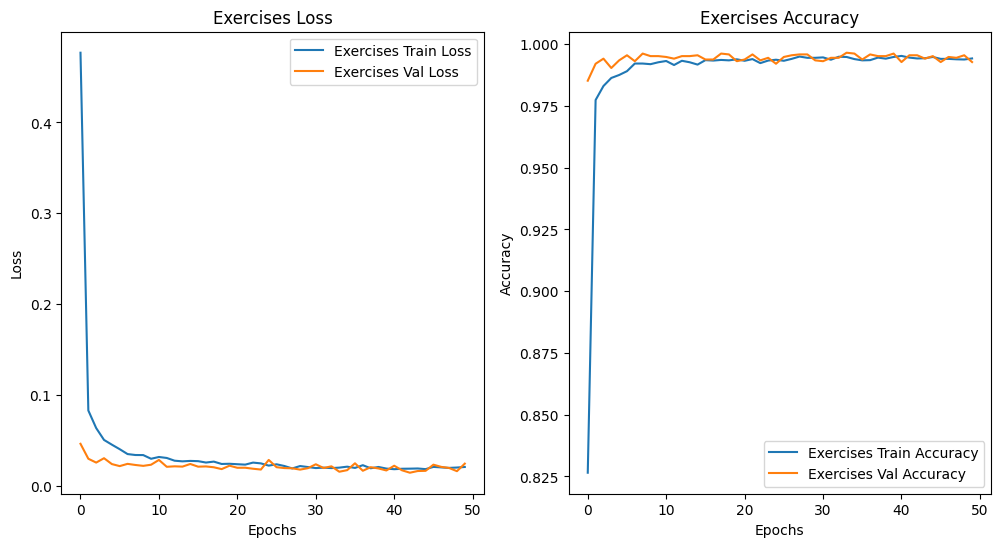

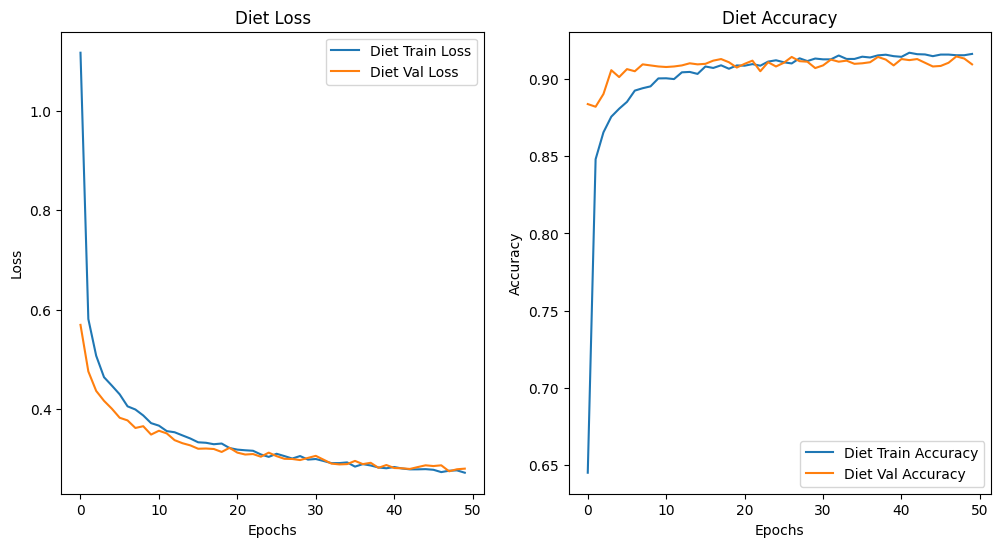

In [32]:
# Plot training & validation loss for Exercises
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['Exercises_loss'], label='Exercises Train Loss')
plt.plot(history.history['val_Exercises_loss'], label='Exercises Val Loss')
plt.title('Exercises Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Plot training & validation accuracy for Exercises
plt.subplot(1, 2, 2)
plt.plot(history.history['Exercises_accuracy'], label='Exercises Train Accuracy')
plt.plot(history.history['val_Exercises_accuracy'], label='Exercises Val Accuracy')
plt.title('Exercises Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot training & validation loss for Diet
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['Diet_loss'], label='Diet Train Loss')
plt.plot(history.history['val_Diet_loss'], label='Diet Val Loss')
plt.title('Diet Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Plot training & validation accuracy for Diet
plt.subplot(1, 2, 2)
plt.plot(history.history['Diet_accuracy'], label='Diet Train Accuracy')
plt.plot(history.history['val_Diet_accuracy'], label='Diet Val Accuracy')
plt.title('Diet Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [34]:
# Assume 'model' is the trained model you want to use for prediction.
prediksi = X_test.iloc[:1].copy()  # Assuming you want to predict for the first row of X_test

# Get predictions for both outputs
predictions = model.predict(prediksi)

# Access predictions for diet and exercises separately
# Get the predicted class index (argmax) for diet and exercises
predicted_diet_class = predictions[0].argmax(axis=1)[0]
predicted_exercises_class = predictions[1].argmax(axis=1)[0]

# Create a dictionary with predictions, ensuring consistent lengths
pred_dict = {
    'y_true_exercises': y_test[:1, 0],  # True exercises value for the first row
    'y_true_diet': y_test[:1, 1],  # True diet value for the first row
    'predicted_diet': [predicted_diet_class],  # Predicted diet class as a single-element list
    'predicted_exercises': [predicted_exercises_class]  # Predicted exercises class as a single-element list
}

# Create DataFrame and transpose for better readability
prediction_df = pd.DataFrame(pred_dict).T
prediction_df.columns = ['Values']
prediction_df

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


,Values
y_true_exercises,3
y_true_diet,3
predicted_diet,3
predicted_exercises,3


**Saving Model**

In [35]:
# Save the model in .h5 format
model.save('gymdiet_model.h5')

print("Model saved as gymdiet_model.h5")

Model saved as gymdiet_model.h5


In [36]:
# Convert the model to TensorFlow Lite
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

# Save the converted model
with open('gymdiet_model.tflite', 'wb') as f:
    f.write(tflite_model)

print("Model saved as gymdiet_model.tflite")

Saved artifact at '/tmp/tmpbrfbh2mx'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 6), dtype=tf.float32, name='keras_tensor_8')
Output Type:
  List[TensorSpec(shape=(None, 10), dtype=tf.float32, name=None), TensorSpec(shape=(None, 5), dtype=tf.float32, name=None)]
Captures:
  135471319400688: TensorSpec(shape=(), dtype=tf.resource, name=None)
  135471284515088: TensorSpec(shape=(), dtype=tf.resource, name=None)
  135471284502592: TensorSpec(shape=(), dtype=tf.resource, name=None)
  135471282891488: TensorSpec(shape=(), dtype=tf.resource, name=None)
  135471282893952: TensorSpec(shape=(), dtype=tf.resource, name=None)
  135471282894480: TensorSpec(shape=(), dtype=tf.resource, name=None)
  135471282887264: TensorSpec(shape=(), dtype=tf.resource, name=None)
  135471282881632: TensorSpec(shape=(), dtype=tf.resource, name=None)
  135471282887616: TensorSpec(shape=(), dtype=tf.resource, name=None)
  135471282259040: TensorSpec